In [ ]:
!pip install dc_stat_think==1.1.1

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install numba==0.55.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 30.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install statsmodels==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 42.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pickle
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst
import scipy
import numpy as np
import statsmodels.api as sm
import statistics
import random
import math

In [ ]:
sns.set()

In [ ]:
data = pickle.load(open("Fimińska.p", "rb"))

![Picture title](image-20220620-170405.png)

In [ ]:
c = (data[2][5]- data[2][4])/(0.01)
print(c)

14.999999999999858


In [ ]:
print((data[2][5]- data[2][3])/(0.02))

14.999999999999858


In [ ]:
c = (data[20][2]- data[20][1])/(0.01)
print(c)

14.999999999999858


In [ ]:
def spadki_pojedyncze(data):
    lista = []
    for i in range(0, 49):
        for j in range(0, 10000):
            if round(data[i][j+1],2) != round(data[i][j] + 15*0.01,2):
                lista.append(data[i][j]-data[i][j+1] + 0.15)
    return lista

In [ ]:
X_i = (spadki_pojedyncze(data))

In [ ]:
statistics.mean(X_i)

10.079095623718123

In [ ]:
scipy.stats.kstest(X_i, scipy.stats.expon(scale=10).cdf)

KstestResult(statistic=0.013164542458974582, pvalue=0.3733257082374962)

In [ ]:
scipy.stats.kstest(X_i, scipy.stats.expon(scale=10.1).cdf)

KstestResult(statistic=0.00960538299502367, pvalue=0.7640625329749026)

In [ ]:
scipy.stats.kstest(X_i, scipy.stats.expon(scale=statistics.mean(X_i)).cdf)

KstestResult(statistic=0.010347225029478269, pvalue=0.6792206421217072)

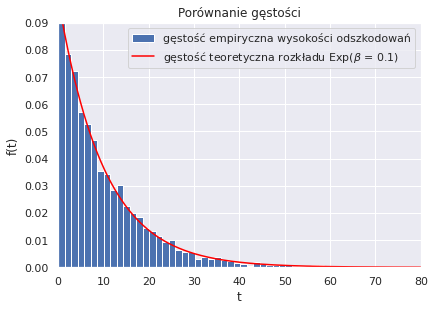

In [ ]:
plt.figure(figsize=(6.5,4.5))
plt.hist(X_i, bins=60, density=True, label='gęstość empiryczna wysokości odszkodowań')
plt.plot(np.arange(0,100,0.01), scipy.stats.expon.pdf(np.arange(0,100,0.01), scale=statistics.mean(X_i)), color='red',
label="gęstość teoretyczna rozkładu Exp($\\beta$ = 0.1)")
plt.legend()
plt.title("Porównanie gęstości")
plt.xlabel('t')
plt.ylabel("f(t)")
plt.ylim(0,0.09)
plt.xlim(0,80)
plt.savefig("gestosc_Xi.pdf")

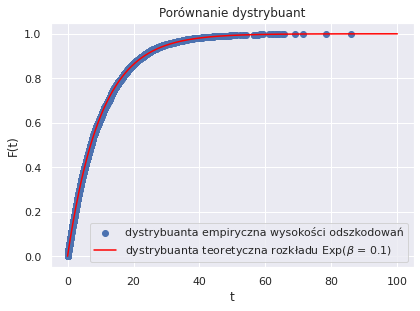

In [ ]:
plt.figure(figsize=(6.5,4.5))
arg, val = dcst.ecdf(X_i)
plt.scatter(arg,val, label="dystrybuanta empiryczna wysokości odszkodowań")
plt.plot(np.arange(0,100, 0.01), scipy.stats.expon.cdf(np.arange(0,100,0.01), scale=statistics.mean(X_i))
, color='red',
label="dystrybuanta teoretyczna rozkładu Exp($\\beta$ = 0.1)")
plt.xlabel('t')
plt.ylabel("F(t)")
plt.title("Porównanie dystrybuant")
plt.legend()
plt.savefig("dystrybuanta_Xi.pdf")

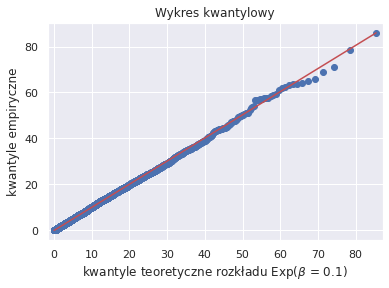

In [ ]:
sm.qqplot(np.array(X_i),  dist=scipy.stats.expon(scale=statistics.mean(X_i)), line="q");
plt.xlabel('kwantyle teoretyczne rozkładu Exp($\\beta$ = 0.1)')
plt.ylabel("kwantyle empiryczne")
plt.title("Wykres kwantylowy")
plt.savefig("kwantylowy.pdf")

![Picture title](image-20220620-170440.png)

In [ ]:
#pierwszy sposob, liczenie - szukanie lambdy
def moments(data):
    all_times = []
    for i in range (len(data)):
        moments=[]
        for j in range (len(data[i])-1):
            if round(data[i][j+1],2) != round(data[i][j] + 15*0.01,2):
                moment=(j+1)/100
                moments.append(moment) #momenty skoków w pojedynczej trajektorii
        times = np.diff(moments) #czasy między skokami w pojedynczej trajektorii
        times_as_list = list(times) #żeby się dopisywały kolejne elementy do listy, a nie dodawały między sobą na odpowia
                                    #dających sobie indeksach
        all_times += times_as_list  #lista czasów między skokami dla wszystkich tajektorii
    return all_times

In [ ]:
print(moments(data))

[0.8899999999999999, 0.5700000000000001, 0.9700000000000002, 3.69, 0.019999999999999574, 0.6100000000000003, 0.2400000000000002, 0.08000000000000007, 0.669999999999999, 0.02000000000000135, 1.2199999999999989, 1.1300000000000008, 0.129999999999999, 0.6000000000000014, 0.75, 0.33000000000000007, 0.6199999999999992, 0.7300000000000004, 1.3699999999999992, 2.580000000000002, 0.08999999999999986, 1.1699999999999982, 0.4800000000000004, 0.08999999999999986, 0.7600000000000016, 0.129999999999999, 0.35999999999999943, 0.7899999999999991, 1.9200000000000017, 0.0799999999999983, 0.6500000000000021, 1.379999999999999, 0.2699999999999996, 1.0399999999999991, 1.8900000000000006, 1.240000000000002, 0.9899999999999984, 0.33000000000000185, 0.7899999999999991, 1.3599999999999994, 0.0799999999999983, 0.6200000000000045, 1.0399999999999991, 0.07000000000000028, 0.18999999999999773, 6.009999999999998, 1.2199999999999989, 0.7600000000000051, 1.4499999999999957, 2.6499999999999986, 1.3200000000000003, 0.6

In [ ]:
scipy.stats.kstest(moments(data), scipy.stats.expon(scale=1.009).cdf)

KstestResult(statistic=0.015236975790019702, pvalue=0.20810879094191137)

In [ ]:
lam = statistics.mean(moments(data)) #srednia czasow oczekiwania, czyli exp(1/lambda) i N(t) ma 1/lambda
print(1/lam)
print(lam)


0.9906006320722532
1.0094885543411012


In [ ]:
mu = statistics.mean(X_i)
mu

10.079095623718123

In [ ]:
theta = (c/((1/lam)*10))-1
print(theta)

0.5142328315116373


In [ ]:
(1+0.5)*10*1

15.0

In [ ]:
#drugi sposob, wykresem - sprawdzenie
def momenty_skokow(trajektoria):
    lista = []
    for j in range(0, 10000):
        if trajektoria[j] > trajektoria[j+1]:
            lista.append(j/100)
    return lista

In [ ]:
skoki = momenty_skokow(data[1])
len(skoki)
print(skoki)

[1.42, 2.13, 4.98, 5.28, 8.04, 11.06, 11.71, 12.53, 13.1, 13.57, 14.67, 16.04, 16.96, 17.04, 17.77, 18.11, 18.87, 19.54, 20.16, 20.87, 27.95, 28.1, 28.22, 29.46, 30.2, 30.25, 30.37, 30.6, 30.92, 32.52, 33.74, 33.95, 35.66, 36.53, 36.96, 37.97, 39.07, 39.86, 41.23, 42.85, 43.0, 44.97, 45.24, 45.53, 46.16, 46.39, 47.68, 49.71, 50.25, 51.03, 51.33, 51.64, 52.12, 54.37, 55.54, 55.86, 55.93, 56.62, 56.89, 56.93, 57.23, 57.76, 58.02, 58.71, 59.02, 59.14, 59.53, 59.98, 60.35, 60.77, 61.78, 62.39, 62.57, 63.35, 63.74, 64.05, 64.07, 67.12, 67.19, 67.85, 68.31, 68.87, 70.39, 70.62, 72.39, 74.76, 75.17, 75.55, 75.81, 76.85, 76.99, 77.35, 79.08, 79.96, 81.2, 82.96, 83.5, 86.54, 87.37, 91.64, 92.72, 93.68, 93.86, 94.62, 95.29, 95.64, 96.42]


In [ ]:
wszystkie_skoki = []
for i in range(0, len(data)):
    wszystkie_skoki.append(momenty_skokow(data[i]))
print(wszystkie_skoki)

[[0.53, 1.42, 1.99, 2.96, 6.65, 6.67, 7.28, 7.52, 7.6, 8.27, 8.29, 9.51, 10.64, 10.77, 11.37, 12.12, 12.45, 13.07, 13.8, 15.17, 17.75, 17.84, 19.01, 19.49, 19.58, 20.34, 20.47, 20.83, 21.62, 23.54, 23.62, 24.27, 25.65, 25.92, 26.96, 28.85, 30.09, 31.08, 31.41, 32.2, 33.56, 33.64, 34.26, 35.3, 35.37, 35.56, 41.57, 42.79, 43.55, 45.0, 47.65, 48.97, 49.62, 49.99, 52.72, 53.67, 54.21, 54.33, 54.68, 54.71, 56.51, 57.24, 59.88, 60.15, 61.18, 63.18, 65.17, 66.31, 67.3, 68.81, 71.8, 71.89, 72.66, 72.83, 73.58, 74.65, 74.89, 76.33, 76.42, 76.99, 78.01, 78.88, 80.25, 80.58, 80.83, 81.71, 82.1, 88.36, 88.38, 91.37, 91.58, 92.03, 92.12, 92.71, 92.97, 93.09, 93.7, 94.48, 94.67, 98.32, 98.5, 99.54], [1.42, 2.13, 4.98, 5.28, 8.04, 11.06, 11.71, 12.53, 13.1, 13.57, 14.67, 16.04, 16.96, 17.04, 17.77, 18.11, 18.87, 19.54, 20.16, 20.87, 27.95, 28.1, 28.22, 29.46, 30.2, 30.25, 30.37, 30.6, 30.92, 32.52, 33.74, 33.95, 35.66, 36.53, 36.96, 37.97, 39.07, 39.86, 41.23, 42.85, 43.0, 44.97, 45.24, 45.53, 46.16,

In [ ]:
len(wszystkie_skoki)

50

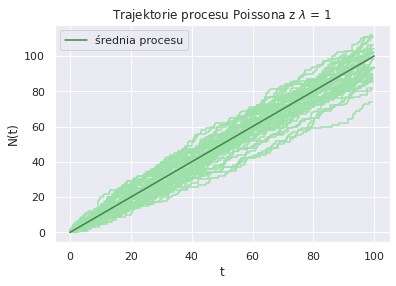

In [ ]:
for j in wszystkie_skoki:
    plt.step(j, np.arange(0,len(j)), color="#9DE0A9")
x = np.linspace(0, 100, 1000)
y = 1*x

plt.plot(x,y, color='#44824F', label ="średnia procesu")
plt.title("Trajektorie procesu Poissona z $\lambda$ = 1")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.legend()
#plt.savefig("trajektorie_Poisson.pdf")

In [ ]:
#sprawdzenie czy wygenerowany pr poissona dla tej lambdy jest taki sam
def Poiss_time(T, lambda_):
    S_i = []
    t = 0
    while T > t:
        U = np.random.rand()
        S_i.append(t)
        t -= (1/lambda_)*np.log(U)
    return S_i

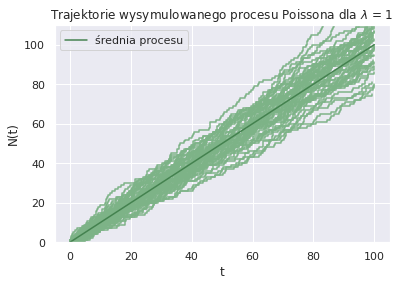

In [ ]:
for _ in range(0,50):
    x = Poiss_time(100, 1)
    y = np.arange(0, len(x))
    sns.lineplot(x=x, y=y, drawstyle="steps-post", color='#7DB387')
z = np.linspace(0, 100, 1000)
f = 1*z

plt.plot(z,f, color='#44824F', label ="średnia procesu")
plt.title("Trajektorie wysymulowanego procesu Poissona dla $\lambda$ = 1")
plt.legend()
plt.xlabel("t")
plt.ylabel("N(t)")
plt.ylim(0,110)
plt.savefig("poisson_gen.pdf")

![Picture title](image-20220620-170337.png)

In [ ]:
def generate_poisson_process_2(lmbd, T):
    steps = scipy.stats.poisson.rvs(lmbd*T)
    times = [random.random()*T for i in np.arange(steps)]
    times.sort()
    return times

In [ ]:
def generate_Rt(lmbd, mu, theta, u, T):
    times = generate_poisson_process_2(lmbd, T)
    losings = [scipy.stats.expon.rvs(0, mu) for i in np.arange(len(times))]
    c = (1 + theta)*((lmbd)*mu)
    Rt_vector = [u + c * times[i] -  sum(losings[:i+1]) for i in np.arange(len(times))]
    return times, Rt_vector

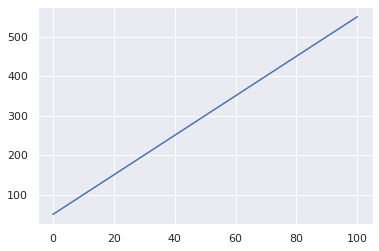

In [ ]:
sr_pr_ryz = 50 + 15*np.arange(0,100.01,0.01) - 10*(1/1)*np.arange(0,100.01,0.01)
plt.plot(np.arange(0,100.01,0.01), sr_pr_ryz)

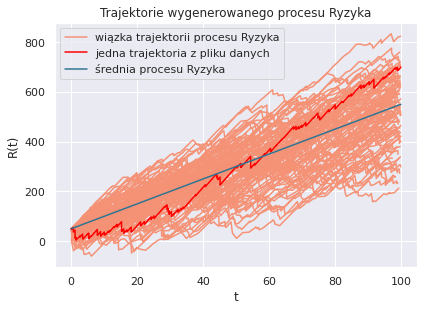

In [ ]:
lam = 1
mu = 10
theta = 0.5
u = 50
T = 100
risk_process = [generate_Rt(1/lam, mu, theta, u, T) for i in np.arange(100)]
plt.figure(figsize=(6.5,4.5))
plt.plot(risk_process[1][0], risk_process[1][1], color="#F59276", label='wiązka trajektorii procesu Ryzyka')
for process in risk_process:
    plt.plot(process[0], process[1], color="#F59276")
plt.plot(np.arange(0,100.01, 0.01),data[5], color='red', label='jedna trajektoria z pliku danych')
plt.plot(np.arange(0,100.01,0.01), sr_pr_ryz, color='#2F7591', label='średnia procesu Ryzyka')
plt.legend()
plt.xlabel("t")
plt.ylabel("R(t)")
plt.title("Trajektorie wygenerowanego procesu Ryzyka")
plt.savefig("pr_ryzyka.pdf")

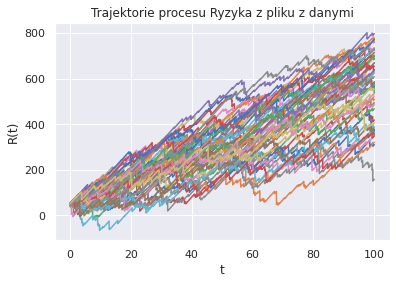

In [ ]:
for i in range(0,len(data)-1):
    x = np.arange(0,100.01,0.01)
    plt.plot(x, data[i])
plt.xlabel("t")
plt.ylabel("R(t)")
plt.title("Trajektorie procesu Ryzyka z pliku z danymi")
plt.savefig("pr_ryzyka_plik.pdf")

![Picture title](image-20220620-193513.png)

In [ ]:
#dla danych z pliku
counter = 0
for i in range(0, 49):
        for j in range(0, 10000):
            if data[i][j] < 0:
                counter+=1
                break
                
counter/50

0.08

In [ ]:
sum([min(data[i]) <0  for i in range(len(data)) ])/len(data)

0.08

JA

In [ ]:
def Poiss_time(T, lambda_):
    S_i = []
    t = 0
    while T > t:
        U = np.random.rand()
        S_i.append(t)
        t -= (1/lambda_)*np.log(U)
    return S_i

In [ ]:
def prawd_ruiny(lam, mu, theta, u, T):
    n = 0
    c = (1+theta)*mu*(lam)
    for _ in range(1000):
        p = Poiss_time(T,lam)
        R = np.ndarray(len(p))
        x = scipy.stats.expon.rvs(scale = mu, size=len(p))
        for index, i in enumerate(p):
            R[int(index)] = u + c * i - np.sum(x[:index])
            if R[index] < 0:
                n += 1
                break
    return(n/1000)

In [ ]:
print(prawd_ruiny(1/lam, mu, theta, 50, 100))

0.112


In [ ]:
print(prawd_ruiny(1, 10, 0.5, 50, 100))

0.124


In [ ]:
print(prawd_ruiny(1, 10, 0.5, 50, 200))

0.134


In [ ]:
print(prawd_ruiny(1/lam, mu, theta, 50, 200))

0.106


In [ ]:
z = 0
for _ in range(20):
    z += prawd_ruiny(1, 10, 0.5, 50, 100)
print(z/20)

0.12395


In [ ]:
z = 0
for _ in range(20):
    z += prawd_ruiny(1, 10, 0.5, 50, 200)
print(z/20)

0.12635


In [ ]:
z = 0
for _ in range(100):
    z += prawd_ruiny(1, 10, 0.5, 50, 200)
print(z/100)

0.12791000000000002


KAROLINA

In [ ]:
#proces ryzyka
def risk(lam, T):
    c = 15
    u=50
    t = 0
    times = []
    
    while sum(times)<T:
        t = scipy.stats.expon.rvs(scale = 1)
        times.append(t)
    times_zero = [0] + times
    x_axis = np.cumsum(times_zero) #momenty zajścia jakiegoś zdarzenia(takie jak momenty skoków jpp)
    
    N = len(times_zero)
    X_i = scipy.stats.expon.rvs(size=N, scale = 10) #wysokości spadków
    R_list = []
    k=0
    #falls = [] #wysokości spadku, czyli człon z sumą
    for i in x_axis:
        fall = sum(X_i[:k])
        R = u + c*i - fall
        R_list.append(R)
        #falls.append(fall)
        k = k+1
    #helper = X_i[:k]
    return(times_zero,R_list,x_axis)
    #return X_i

In [ ]:
def pr(T):
    counter=0
    for i  in range(1000):
        risk_process = risk(1, T)
        x_risk = risk_process[2]
        y_risk = risk_process[1]
    
        ruin = [element < 0 for element in risk_process[1]]
        if True in ruin:
            counter +=1

    return counter/1000


In [ ]:
l = 0
for _ in range(20):
   l+= pr(100)

l/20

0.1214

In [ ]:
pr(200)

0.116

MACIEK

In [ ]:
def partition(l, r, nums):
    # Last element will be the pivot and the first element the pointer
    pivot, ptr = nums[r], l
    for i in range(l, r):
        if nums[i] <= pivot:
            # Swapping values smaller than the pivot to the front
            nums[i], nums[ptr] = nums[ptr], nums[i]
            ptr += 1
    # Finally swappping the last element with the pointer indexed number
    nums[ptr], nums[r] = nums[r], nums[ptr]
    return ptr

In [ ]:
def quicksort(l, r, nums):
    if len(nums) == 1:  # Terminating Condition for recursion. VERY IMPORTANT!
        return nums
    if l < r:
        pi = partition(l, r, nums)
        quicksort(l, pi-1, nums)  # Recursively sorting the left values
        quicksort(pi+1, r, nums)  # Recursively sorting the right values
    return nums

In [ ]:
def poisson_conditional_method(T,lamb):
    I = np.random.poisson(lamb * T )
    if I == 0:
        return 
    else:
        x = np.random.random(I) * T
        return quicksort(0,len(x)-1,x)

In [ ]:
def pr_ryzyka(T, u, theta, mu, beta):
    n = 0
    c = (1+theta)*(mu*beta)
    for _ in range(1000):
        p = poisson_conditional_method(T,beta)
        R = np.ndarray(len(p))
        for index, time in enumerate(p):
            if index == 0 :
                R[index] = u + c * time -scipy.stats.expon.rvs(scale=mu)
            else:
                R[index] = R[index - 1] + c *( p[index] - p[index -1]) -scipy.stats.expon.rvs(scale=mu)
            if R[index] < 0:
                n += 1
                break
    return(n/1000)

In [ ]:
beta=1/lam
pr_ryzyka(100, 50, 0.5, 10, 1)

0.119

In [ ]:
pr_ryzyka(200, 50, 0.5,10,1)

0.119

In [ ]:
def poiss(T, lamb):
    N = np.random.poisson(lam=lamb*T)
    taus = [random.uniform(0,T) for _ in range(N)]
    data = sorted(taus)
    return data

In [ ]:
def proces2(T=100, beta=0.097 ,theta=0.96, lamb=1.4854, u=50):
    Tn = poiss(T, lamb)
    times = np.arange(0,T,0.01)
    Xs = [np.random.exponential(scale = 1/beta) for _ in range(len(Tn))]
    c = (1 + theta)*lamb/beta
    #c=30
    Rt = []
    i = 0
    below = 0

    for t in times:
        losses_index = 0
        for i in Tn:
            if t >i:
                losses_index +=1
        if losses_index ==0:
            val = u + c*t
        else: 
            val = u + c*t-sum(Xs[0:losses_index])
        Rt.append(val)
        if val < 0:
            below = 1
            return below
        i+=1
    return below

In [ ]:
belows= 0
for n in range(100):
    a = proces2(200, 1/10.079095623718123,0.5142328315116373, 1, 50)
    belows += a
print(belows/100)

0.09


In [ ]:
belows= 0
for n in range(100):
    a = proces2(200, 1/10.079095623718123,0.5142328315116373, 1, 50)
    belows += a
print(belows/100)

NameError: name 'proces2' is not defined

In [ ]:
belows= 0
for n in range(100):
    a = proces2(100, 1/10.079095623718123,0.5142328315116373, 1, 50)
    belows += a
print(belows/100)

0.1


![Picture title](image-20220622-000529.png)

In [ ]:
def ruin_infinity(N,data=data, u=50):
    Z = np.zeros(N)
    
    for i in range(N):
        K = scipy.stats.geom(loc=-1,p=theta/(1+theta)).rvs()
        Y = scipy.stats.expon(scale=10).rvs(size=K)
        
        if sum(Y) > u:
            Z[i] = 1
            
    return sum(Z)/N

ruin_infinity(100)    

0.09

In [ ]:
s = 0
for _ in range(100):
    s +=ruin_infinity(100)
print(s/100)

0.12439999999999996


![Picture title](image-20220622-000623.png)

In [ ]:
wart_teoretyczna = 1/(1+0.5)*np.exp((-1/10 * 50 * (0.5/(1+0.5))))
wart_teoretyczna

0.12591706855837456

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2f71fc1-2f07-4ba9-9fc1-c6f60eb115db' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>